In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Read in the sample data drop irrelevant features

In [ ]:
df = pd.read_csv('us_congestion_2016_2022.csv')

In [ ]:
df = df.drop(['ID', 'Country', 'Description'], axis=1)

### 'Severity' column is numerical but still categorical, change it to a string type

In [6]:
df['Severity'] = df['Severity'].astype('string')

### 'StartTime', 'EndTime', and 'WeatherTimeStamp' should be converted to DateTime
This could come in handy when we do our time series analysis

In [24]:
df['StartTime'] = dd.to_datetime(df['StartTime'])

In [17]:
df['EndTime'] = dd.to_datetime(df['EndTime'])

In [18]:
df['WeatherTimeStamp'] = dd.to_datetime(df['WeatherTimeStamp'])

In [ ]:
df.head()

### Take a look at the different data types

In [86]:
numerical = df.select_dtypes(include='number')
numerical.head()

,Start_Lat,Start_Lng,Distance(mi),DelayFromTypicalTraffic(mins),DelayFromFreeFlowSpeed(mins),Temperature(F),WindChill(F),Humidity(%),Pressure(in),Visibility(mi),WindSpeed(mph),Precipitation(in)
0,39.191032,-120.819740,1.40,2.58,2.60,54.0,NaN,30.0,30.15,10.0,3.5,NaN
1,41.736015,-87.721565,0.73,0.42,1.00,39.0,31.8,70.0,30.06,10.0,11.5,NaN
2,32.519043,-93.741096,1.80,1.00,2.00,30.0,30.0,79.0,30.20,10.0,3.0,0.00
3,40.730564,-74.001709,1.42,1.00,2.00,48.0,48.0,93.0,29.92,1.0,3.0,0.04
4,33.758331,-118.238533,2.60,4.90,6.92,66.9,NaN,79.0,29.89,9.0,NaN,NaN


In [87]:
categorical = df.select_dtypes(exclude='number')
categorical.head()

,Severity,StartTime,EndTime,Congestion_Speed,Street,City,County,State,ZipCode,LocalTimeZone,WeatherStation_AirportCode,WeatherTimeStamp,WindDir,Weather_Event,Weather_Conditions
0,2,2016-12-20 19:19:00-05:00,2016-12-20 19:33:47-05:00,Moderate,I-80 W,Dutch Flat,Placer,CA,95714,US/Pacific,KBLU,2016-12-20 18:52:00-05:00,North,NaN,Clear
1,0,2018-11-16 17:18:00-05:00,2018-11-16 18:08:28-05:00,Slow,S Pulaski Rd,Chicago,Cook,IL,60652-3633,US/Central,KMDW,2018-11-16 16:53:00-05:00,West,NaN,Overcast
2,0,2021-02-18 20:32:00-05:00,2021-02-18 21:21:32-05:00,Moderate,E Texas St,Bossier City,Bossier,LA,71111,US/Central,KDTN,2021-02-18 20:53:00-05:00,WNW,NaN,Fair
3,0,2020-11-13 08:06:00-05:00,2020-11-13 08:48:22-05:00,Slow,Avenue of the Americas,New York,New York,NY,10014-4403,US/Eastern,KJRB,2020-11-13 08:15:00-05:00,VAR,NaN,Light Rain
4,1,2017-08-24 09:54:00-04:00,2017-08-24 11:13:19-04:00,Slow,W Ocean Blvd,Long Beach,Los Angeles,CA,90802,US/Pacific,KLGB,2017-08-24 09:53:00-04:00,Calm,NaN,Overcast


In [153]:
for column in df.columns:
    print(f'Unique values in column "{column}": {df[column].nunique()}')

Unique values in column "Severity": 5
Unique values in column "Start_Lat": 869546
Unique values in column "Start_Lng": 869456
Unique values in column "StartTime": 1155768
Unique values in column "EndTime": 1780362
Unique values in column "Distance(mi)": 5416
Unique values in column "DelayFromTypicalTraffic(mins)": 3077
Unique values in column "DelayFromFreeFlowSpeed(mins)": 3425
Unique values in column "Congestion_Speed": 3
Unique values in column "Street": 80096
Unique values in column "City": 14535
Unique values in column "County": 1940
Unique values in column "State": 49
Unique values in column "ZipCode": 301295
Unique values in column "LocalTimeZone": 4
Unique values in column "WeatherStation_AirportCode": 2053
Unique values in column "WeatherTimeStamp": 520240
Unique values in column "Temperature(F)": 799
Unique values in column "WindChill(F)": 926
Unique values in column "Humidity(%)": 100
Unique values in column "Pressure(in)": 1125
Unique values in column "Visibility(mi)": 75
U

In [92]:
for column in numerical:
    print(df[column].describe())
    print()

count    2.000000e+06
mean     3.717962e+01
std      5.172276e+00
min      2.454851e+01
25%      3.378125e+01
50%      3.848143e+01
75%      4.085163e+01
max      4.900249e+01
Name: Start_Lat, dtype: float64

count    2.000000e+06
mean    -9.236327e+01
std      1.712666e+01
min     -1.244978e+02
25%     -1.063855e+02
50%     -8.686253e+01
75%     -7.743028e+01
max     -6.707613e+01
Name: Start_Lng, dtype: float64

count    2.000000e+06
mean     2.988470e+00
std      2.882045e+00
min      0.000000e+00
25%      1.260000e+00
50%      2.320000e+00
75%      3.780000e+00
max      1.858700e+02
Name: Distance(mi), dtype: float64

count    2.000000e+06
mean     2.814574e+00
std      4.055315e+00
min      0.000000e+00
25%      5.500000e-01
50%      1.920000e+00
75%      3.950000e+00
max      2.872500e+02
Name: DelayFromTypicalTraffic(mins), dtype: float64

count    2.000000e+06
mean     4.018185e+00
std      4.561847e+00
min      0.000000e+00
25%      1.820000e+00
50%      3.000000e+00
75%      

### Lets check for null values

In [95]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Weather_Event,1871992,0.935996
Precipitation(in),825186,0.412593
WindChill(F),759205,0.379603
WindSpeed(mph),189470,0.094735
Visibility(mi),58370,0.029185
Weather_Conditions,57097,0.028549
WindDir,47385,0.023692
Humidity(%),46167,0.023083
Temperature(F),43957,0.021979
Pressure(in),41123,0.020561


In [96]:
df_drop_columns = df.drop(['Weather_Event', 'Precipitation(in)', 'WindChill(F)', 'WindSpeed(mph)'], axis=1)
df_drop_columns = df_drop_columns.dropna()

In [124]:
df_drop_we = df.drop('Weather_Event', axis=1)
df_drop_we = df_drop_we.dropna()

In [97]:
df_drop_we_pr = df.drop(['Weather_Event', 'Precipitation(in)'], axis=1)
df_drop_we_pr = df_drop_we_pr.dropna()

df_drop_we_pr_wc = df.drop(['Weather_Event', 'Precipitation(in)', 'WindChill(F)'], axis=1)
df_drop_we_pr_wc = df_drop_we_pr_wc.dropna()

print(f'Preserves {len(df_drop_we.axes[0]) / len(df.axes[0]) * 100}% of data points')
print(f'Preserves {len(df_drop_we_pr.axes[0]) / len(df.axes[0]) * 100}% of data points')
print(f'Preserves {len(df_drop_we_pr_wc.axes[0]) / len(df.axes[0]) * 100}% of data points')
print(f'Preserves {len(df_drop_columns.axes[0]) / len(df.axes[0]) * 100}% of data points')

Preserves 53.92555% of data points
Preserves 61.2513% of data points
Preserves 89.1104% of data points
Preserves 95.6529% of data points


### Versus dropping all NaN rows
One thing I notice after dropping missing rows is that Weather_Conditions could be a good standin for Weather_Event

In [98]:
df_drop_rows = df.dropna()

In [99]:
print(f'Preserves {len(df_drop_rows.axes[0]) / len(df.axes[0]) * 100}% of data points')
df_drop_rows

Preserves 2.7325% of data points


,Severity,Start_Lat,Start_Lng,StartTime,EndTime,Distance(mi),DelayFromTypicalTraffic(mins),DelayFromFreeFlowSpeed(mins),Congestion_Speed,Street,...,Temperature(F),WindChill(F),Humidity(%),Pressure(in),Visibility(mi),WindDir,WindSpeed(mph),Precipitation(in),Weather_Event,Weather_Conditions
14,1,41.073479,-73.859322,2018-11-15 21:09:00-05:00,2018-11-15 21:50:18-05:00,0.52,3.10,3.10,Slow,E Franklin St,...,30.0,17.5,88.0,30.05,6.0,ENE,19.6,0.04,Snow,Light Snow
18,2,41.483971,-72.115829,2017-02-12 13:20:00-05:00,2017-02-12 13:32:04-05:00,4.14,3.80,3.65,Fast,I-395 N,...,33.1,24.9,92.0,29.91,0.5,East,10.4,0.05,Fog ;Snow,Snow
24,1,41.551857,-72.744789,2017-02-12 14:18:00-05:00,2017-02-12 14:31:09-05:00,3.59,2.40,2.28,Fast,I-91 N,...,27.0,19.5,78.0,29.84,1.0,NNE,6.9,0.01,Snow,Light Snow
37,1,40.095856,-79.033737,2018-02-07 06:16:00-05:00,2018-02-07 06:58:59-05:00,4.84,3.65,3.72,Fast,Flight 93 Memorial Hwy,...,27.3,17.1,85.0,30.19,2.5,SSE,11.5,0.02,Snow,Light Snow
45,1,41.598888,-73.911339,2017-03-10 11:44:00-05:00,2017-03-10 12:07:25-05:00,1.11,0.00,0.38,Fast,Route 9,...,30.0,21.7,92.0,29.85,1.0,North,9.2,0.03,Snow,Light Snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999878,2,41.954792,-88.016495,2018-11-26 00:21:00-05:00,2018-11-26 01:03:17-05:00,6.40,3.28,3.28,Fast,I-290 W,...,33.1,19.6,100.0,29.60,0.5,NNE,27.6,0.02,Fog ;Snow,Snow
1999919,1,41.921909,-70.822159,2018-03-13 19:45:00-04:00,2018-03-13 20:28:23-04:00,5.62,3.00,3.08,Fast,US-44 W,...,32.0,22.1,88.0,29.44,1.0,NW,13.8,0.01,Snow,Light Snow
1999963,2,42.427422,-123.243393,2019-02-24 18:19:00-05:00,2019-02-24 19:00:29-05:00,0.79,1.97,1.97,Fast,I-5 N,...,33.1,22.6,100.0,29.86,0.2,South,16.1,0.04,Fog ;Snow,Light Snow
1999967,2,41.800808,-78.567505,2018-03-15 19:33:00-04:00,2018-03-15 20:22:17-04:00,4.68,6.55,6.92,Fast,Route 59,...,27.0,15.6,75.0,29.62,3.0,WNW,13.8,0.00,Snow,Light Snow


### We might want access to the various date and time components separately
Im running the rest of these tests of the dataframe df_drop_we, where Weather_Events was dropped before null rows were dropped. The same transformations can be done to any final, clean dataset we decide to use.

In [101]:
def extract_datetime_info(datetime_obj):
    
    return datetime_obj.year, datetime_obj.month, datetime_obj.day, datetime_obj.time()


In [127]:
df_drop_we[['Year', 'Month', 'Day', 'StartTOD']] = df_drop_we['StartTime'].apply(
    lambda x: pd.Series(extract_datetime_info(x))
)

df_drop_we['EndTOD'] = df_drop_we['EndTime'].apply(
    lambda x: pd.Series((pd.to_datetime(x).time()))
)

df_drop_we['WeatherTimeStamp'] = df_drop_we['WeatherTimeStamp'].apply(
    lambda x: pd.Series((pd.to_datetime(x).time()))
)


In [128]:
df_drop_we.head()

,Severity,Start_Lat,Start_Lng,StartTime,EndTime,Distance(mi),DelayFromTypicalTraffic(mins),DelayFromFreeFlowSpeed(mins),Congestion_Speed,Street,...,Visibility(mi),WindDir,WindSpeed(mph),Precipitation(in),Weather_Conditions,Year,Month,Day,StartTOD,EndTOD
2,0,32.519043,-93.741096,2021-02-18 20:32:00-05:00,2021-02-18 21:21:32-05:00,1.80,1.0,2.0,Moderate,E Texas St,...,10.00,WNW,3.0,0.00,Fair,2021,2,18,20:32:00,21:21:32
3,0,40.730564,-74.001709,2020-11-13 08:06:00-05:00,2020-11-13 08:48:22-05:00,1.42,1.0,2.0,Slow,Avenue of the Americas,...,1.00,VAR,3.0,0.04,Light Rain,2020,11,13,08:06:00,08:48:22
5,1,42.665081,-85.661926,2022-02-17 19:50:00-05:00,2022-02-17 20:32:38-05:00,6.88,3.0,3.0,Fast,US-131 S,...,0.75,NNE,15.0,0.04,Light Snow,2022,2,17,19:50:00,20:32:38
7,1,40.705330,-74.089493,2021-01-19 14:42:00-05:00,2021-01-19 15:28:02-05:00,4.93,3.0,5.0,Moderate,John F Kennedy Blvd,...,10.00,SW,14.0,0.00,Mostly Cloudy,2021,1,19,14:42:00,15:28:02
11,2,39.408680,-81.422958,2020-11-10 12:22:00-05:00,2020-11-10 13:48:58-05:00,4.60,0.0,4.0,Moderate,Pike St,...,10.00,SSE,7.0,0.00,Fair,2020,11,10,12:22:00,13:48:58


### I want to rerun some of the same tests on the this new dataset

In [130]:
num = df_drop_we.select_dtypes(include='number')
num.head()

,Start_Lat,Start_Lng,Distance(mi),DelayFromTypicalTraffic(mins),DelayFromFreeFlowSpeed(mins),Temperature(F),WindChill(F),Humidity(%),Pressure(in),Visibility(mi),WindSpeed(mph),Precipitation(in),Year,Month,Day
2,32.519043,-93.741096,1.80,1.0,2.0,30.0,30.0,79.0,30.20,10.00,3.0,0.00,2021,2,18
3,40.730564,-74.001709,1.42,1.0,2.0,48.0,48.0,93.0,29.92,1.00,3.0,0.04,2020,11,13
5,42.665081,-85.661926,6.88,3.0,3.0,21.0,8.0,92.0,28.88,0.75,15.0,0.04,2022,2,17
7,40.705330,-74.089493,4.93,3.0,5.0,40.0,32.0,49.0,29.93,10.00,14.0,0.00,2021,1,19
11,39.408680,-81.422958,4.60,0.0,4.0,76.0,76.0,52.0,29.17,10.00,7.0,0.00,2020,11,10


In [131]:
cat = df_drop_we.select_dtypes(exclude='number')
cat.head()

,Severity,StartTime,EndTime,Congestion_Speed,Street,City,County,State,ZipCode,LocalTimeZone,WeatherStation_AirportCode,WeatherTimeStamp,WindDir,Weather_Conditions,StartTOD,EndTOD
2,0,2021-02-18 20:32:00-05:00,2021-02-18 21:21:32-05:00,Moderate,E Texas St,Bossier City,Bossier,LA,71111,US/Central,KDTN,20:53:00,WNW,Fair,20:32:00,21:21:32
3,0,2020-11-13 08:06:00-05:00,2020-11-13 08:48:22-05:00,Slow,Avenue of the Americas,New York,New York,NY,10014-4403,US/Eastern,KJRB,08:15:00,VAR,Light Rain,08:06:00,08:48:22
5,1,2022-02-17 19:50:00-05:00,2022-02-17 20:32:38-05:00,Fast,US-131 S,Wayland,Allegan,MI,49348,US/Eastern,KGRR,19:53:00,NNE,Light Snow,19:50:00,20:32:38
7,1,2021-01-19 14:42:00-05:00,2021-01-19 15:28:02-05:00,Moderate,John F Kennedy Blvd,Jersey City,Hudson,NJ,07305-2116,US/Eastern,KJRB,14:51:00,SW,Mostly Cloudy,14:42:00,15:28:02
11,2,2020-11-10 12:22:00-05:00,2020-11-10 13:48:58-05:00,Moderate,Pike St,Marietta,Washington,OH,45750,US/Eastern,KPKB,11:53:00,SSE,Fair,12:22:00,13:48:58


In [148]:
for column in num:
    print(df_drop_we[column].describe())
    print()

count    1.078511e+06
mean     3.760648e+01
std      5.071880e+00
min      2.455052e+01
25%      3.393116e+01
50%      3.902682e+01
75%      4.109587e+01
max      4.900211e+01
Name: Start_Lat, dtype: float64

count    1.078511e+06
mean    -9.167867e+01
std      1.692239e+01
min     -1.244978e+02
25%     -1.048967e+02
50%     -8.697442e+01
75%     -7.699271e+01
max     -6.707613e+01
Name: Start_Lng, dtype: float64

count    1.078511e+06
mean     3.391861e+00
std      3.081630e+00
min      0.000000e+00
25%      1.630000e+00
50%      2.620000e+00
75%      4.140000e+00
max      1.858700e+02
Name: Distance(mi), dtype: float64

count    1.078511e+06
mean     2.935424e+00
std      4.169200e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      2.872500e+02
Name: DelayFromTypicalTraffic(mins), dtype: float64

count    1.078511e+06
mean     4.232373e+00
std      4.627051e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      

### Starting with some explorartion but I will continue this in another notebook

In [135]:
# df_drop_we.dtypes

In [136]:
num.dtypes

Start_Lat                        float64
Start_Lng                        float64
Distance(mi)                     float64
DelayFromTypicalTraffic(mins)    float64
DelayFromFreeFlowSpeed(mins)     float64
Temperature(F)                   float64
WindChill(F)                     float64
Humidity(%)                      float64
Pressure(in)                     float64
Visibility(mi)                   float64
WindSpeed(mph)                   float64
Precipitation(in)                float64
Year                               int64
Month                              int64
Day                                int64
dtype: object

In [137]:
cat.dtypes

Severity                      string
StartTime                     object
EndTime                       object
Congestion_Speed              object
Street                        object
City                          object
County                        object
State                         object
ZipCode                       object
LocalTimeZone                 object
WeatherStation_AirportCode    object
WeatherTimeStamp              object
WindDir                       object
Weather_Conditions            object
StartTOD                      object
EndTOD                        object
dtype: object

<AxesSubplot:xlabel='Year', ylabel='Distance(mi)'>

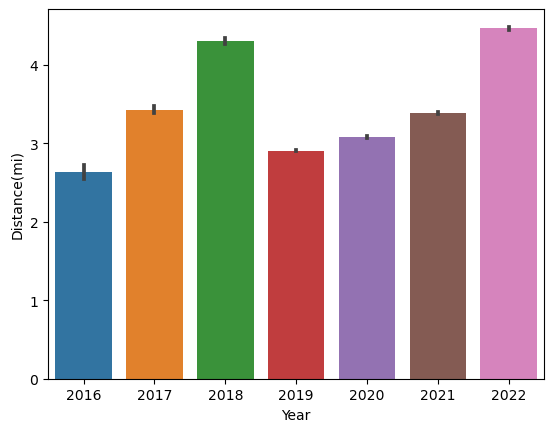

In [138]:
sns.barplot(data = df_drop_we, x = 'Year', y = 'Distance(mi)')

<AxesSubplot:xlabel='Year', ylabel='DelayFromTypicalTraffic(mins)'>

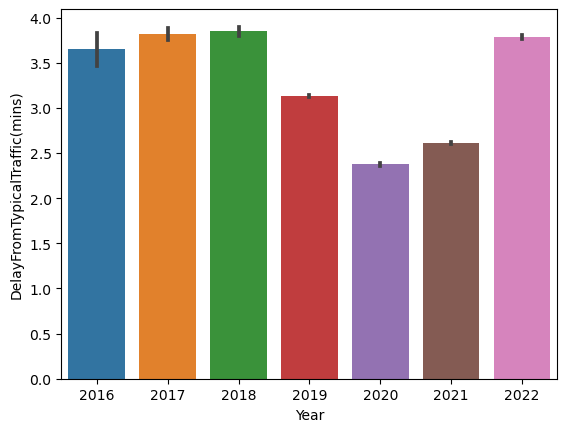

In [139]:
sns.barplot(data = df_drop_we, x = 'Year', y = 'DelayFromTypicalTraffic(mins)')

<AxesSubplot:xlabel='Year', ylabel='DelayFromFreeFlowSpeed(mins)'>

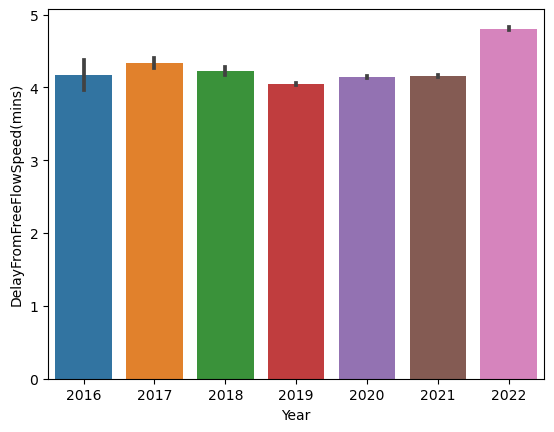

In [140]:
sns.barplot(data = df_drop_we, x = 'Year', y = 'DelayFromFreeFlowSpeed(mins)')

<AxesSubplot:xlabel='Year', ylabel='Temperature(F)'>

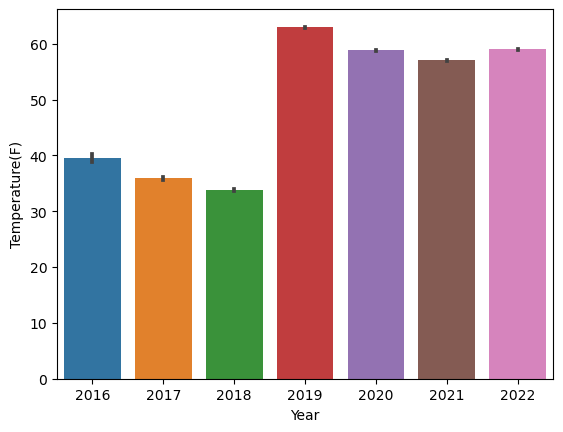

In [142]:
sns.barplot(data = df_drop_we, x = 'Year', y = 'Temperature(F)')

<AxesSubplot:xlabel='Year', ylabel='Humidity(%)'>

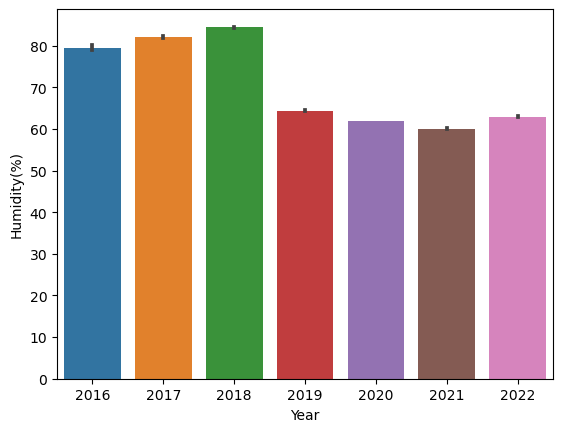

In [143]:
sns.barplot(data = df_drop_we, x = 'Year', y = 'Humidity(%)')

<AxesSubplot:xlabel='Year', ylabel='Visibility(mi)'>

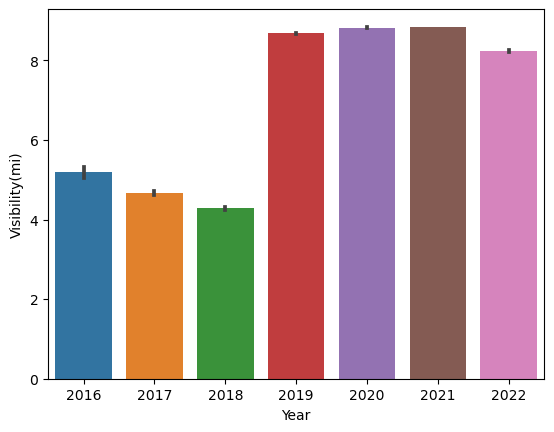

In [144]:
sns.barplot(data = df_drop_we, x = 'Year', y = 'Visibility(mi)')

<AxesSubplot:xlabel='Year', ylabel='WindSpeed(mph)'>

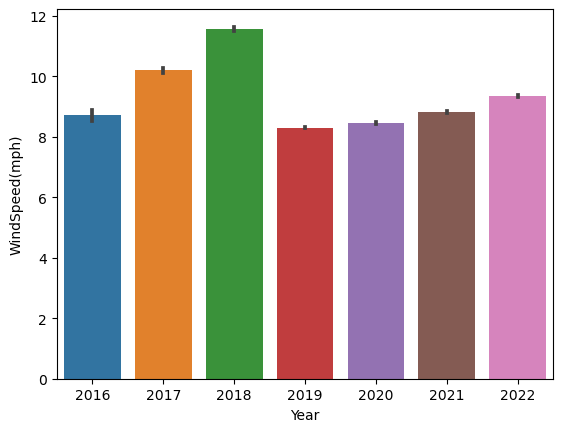

In [145]:
sns.barplot(data = df_drop_we, x = 'Year', y = 'WindSpeed(mph)')

<AxesSubplot:xlabel='Year', ylabel='Precipitation(in)'>

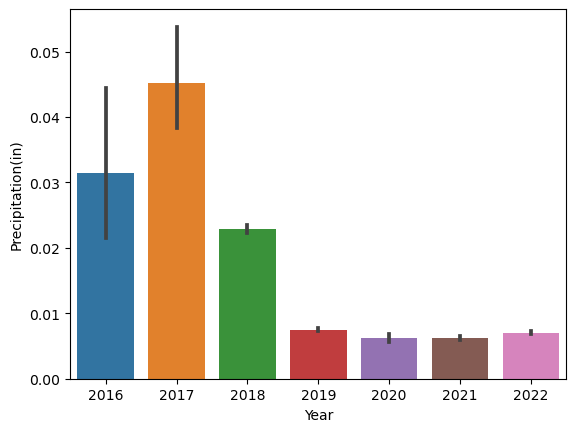

In [146]:
sns.barplot(data = df_drop_we, x = 'Year', y = 'Precipitation(in)')

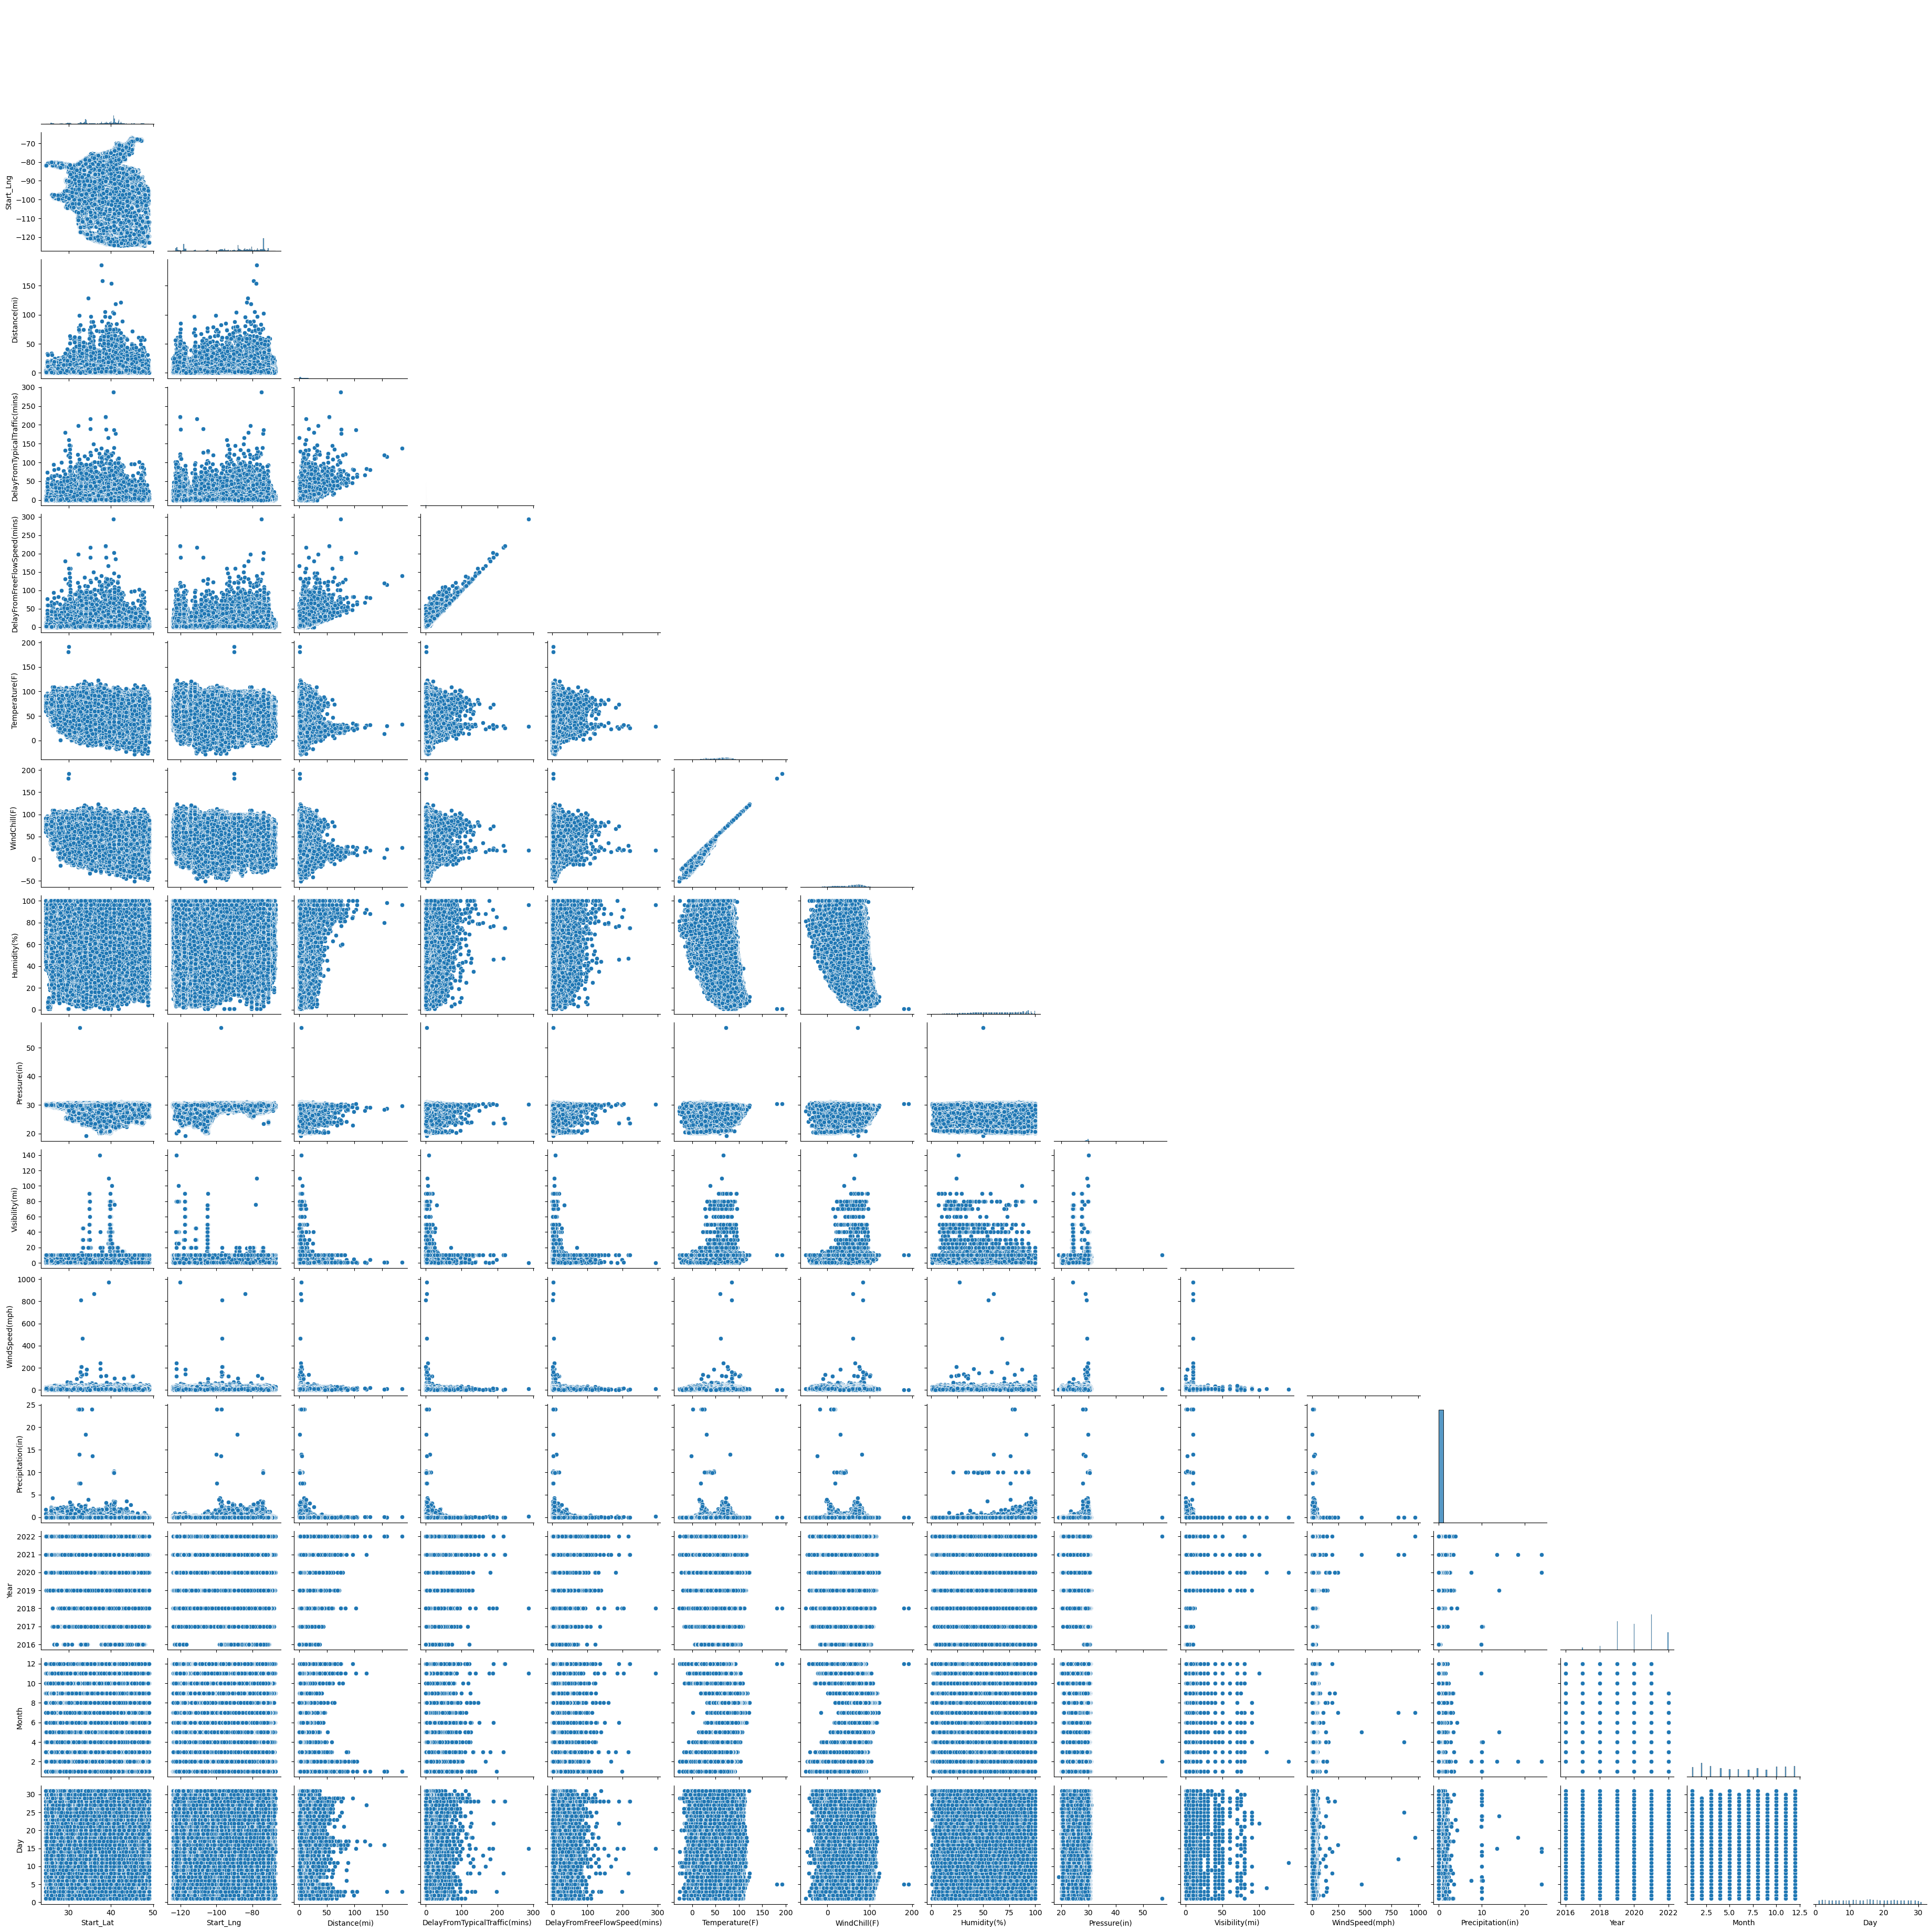

In [149]:
sns.pairplot(df_drop_we, corner=True)

In [ ]:
temp = pd.read_csv('us_congestion_2016_2022.csv')

In [ ]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage(deep=True).sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtypes
    
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
        
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max: 
                    df[col] = df[col].astype(np.int8) 
                    
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max: 
                    df[col] = df[col].astype(np.int16) 
                        
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max: 
                    df[col] = df[col].astype(np.int32) 
                    
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max: 
                    df[col] = df[col].astype(np.int64) 
                    
                else: 
                    if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max: 
                        df[col] = df[col].astype(np.float16) 
                        
                    elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                
                    else:
                        df[col] = df[col].astype(np.float64)
                        
    end_mem = df.memory_usage(deep=True).sum() / 1024**2

    if verbose: 
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    
    return df

In [ ]:
temp = reduce_mem_usage(temp, verbose=True)

In [ ]:
temp